# Estimate the total compensation to be provided to an employee

In [109]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from matplotlib import rc_context, rcParams

In [110]:
# importing the data
df = pd.read_csv('/Users/sahreenhaider/Downloads/train_set.csv')
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


# Data Preprocessing

In [111]:
# checking the datatypes of the features

print(df.dtypes)

Year                    int64
OGC                     int64
OG                     object
DC                     object
Dept                   object
UC                      int64
Union                  object
JF                     object
Job                    object
EI                      int64
Salaries                int64
Overtime                int64
H/D                   float64
YT                     object
Total_Compensation      int64
dtype: object


In [112]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [113]:
df.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [114]:
# shape of the dataset

print(df.shape)

(287836, 15)


In [115]:
df.head(1)

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.0,Calendar,16158


In [116]:
df.iloc[:,1]

0         4
1         4
2         6
3         1
4         2
         ..
287831    3
287832    5
287833    2
287834    1
287835    4
Name: OGC, Length: 287836, dtype: int64

In [117]:
# checking the unique valuses of the feature Union from the dataset

print('Unique values for the first five rows: ',df['Union'].head().unique())
print('='*1000)
print('----> Length of the total unique values: '.title(),len(df['Union'].unique()))

Unique values for the first five rows:  ['SEIU - Health Workers, Local 1021' 'Stationary Engineers, Local 39'
 'Prof & Tech Engineers - Miscellaneous, Local 21'
 "Police Officers' Association"]
----> Length Of The Total Unique Values:  74


In [118]:
# checking for null values throughout the whole dataset

df.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [119]:

print(df.Union.mode())
print(df['JF'].mode())

0    SEIU - Miscellaneous, Local 1021
dtype: object
0    Nursing
dtype: object


In [120]:
# imputing the missing values in their respctive spaces using mode metrics

df["Union"].fillna('SEIU - Miscellaneous, Local 1021', inplace=True)
df['JF'].fillna('Nursing',inplace=True)

In [121]:
iteration = df[['OG','DC','Dept','Union','JF','Job','EI','YT']]

In [122]:
# encoding the categorical values

le = LabelEncoder()
for each in iteration:
    df[each] = le.fit_transform(df[each])

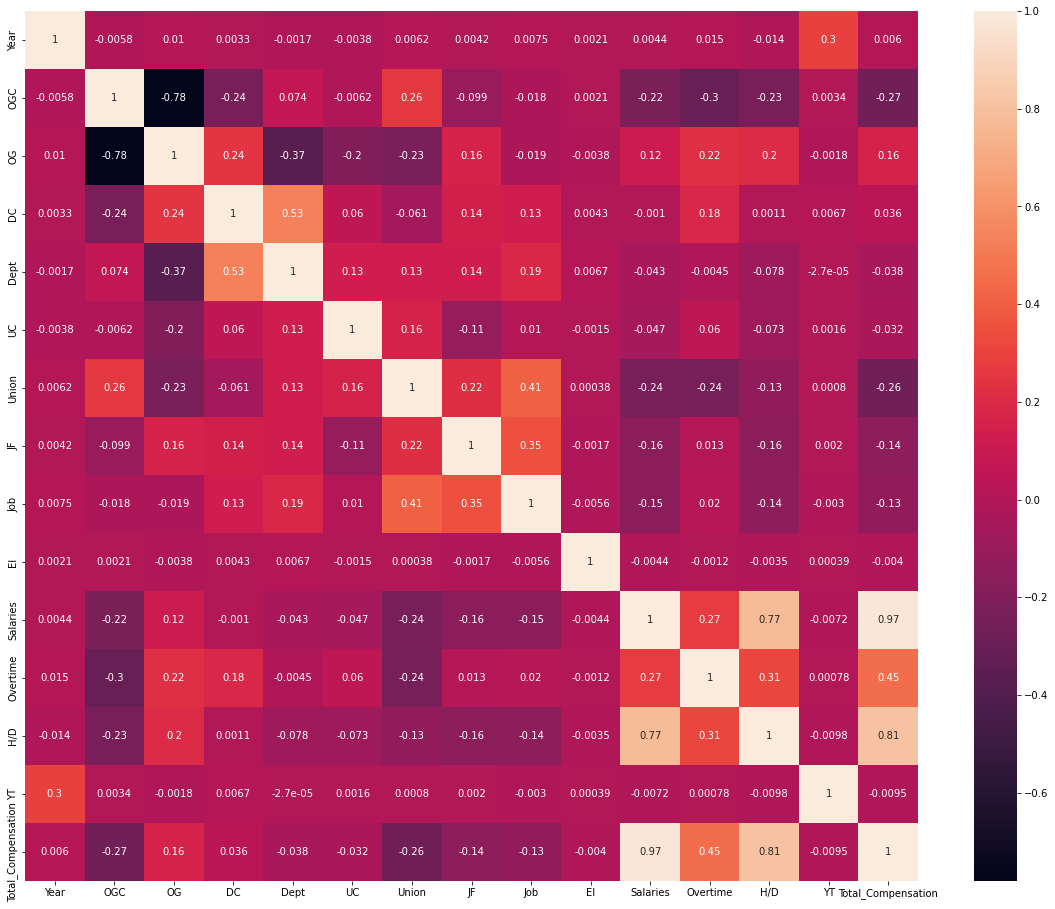

In [123]:
# Plotting a heatmap to check for the correlation among the features of the dataset

with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(20,16))
    sns.heatmap(df.corr(), annot=True)

In [124]:
df_final = df[['OGC', 'OG', 'Union', 'JF', 'Job', 'Salaries', 'Overtime', 'H/D', 'Total_Compensation']]

In [125]:
df_final.corr()

,OGC,OG,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
OGC,1.000000,-0.780611,0.261142,-0.098658,-0.018487,-0.217733,-0.303169,-0.233033,-0.270160
OG,-0.780611,1.000000,-0.226842,0.163729,-0.019165,0.116353,0.224845,0.200547,0.159505
Union,0.261142,-0.226842,1.000000,0.216022,0.408428,-0.237138,-0.238193,-0.131404,-0.260568
JF,-0.098658,0.163729,0.216022,1.000000,0.350306,-0.158145,0.013314,-0.159576,-0.142475
Job,-0.018487,-0.019165,0.408428,0.350306,1.000000,-0.149027,0.020426,-0.141043,-0.131925
Salaries,-0.217733,0.116353,-0.237138,-0.158145,-0.149027,1.000000,0.271575,0.774898,0.972585
Overtime,-0.303169,0.224845,-0.238193,0.013314,0.020426,0.271575,1.000000,0.312468,0.453497
H/D,-0.233033,0.200547,-0.131404,-0.159576,-0.141043,0.774898,0.312468,1.000000,0.806283
Total_Compensation,-0.270160,0.159505,-0.260568,-0.142475,-0.131925,0.972585,0.453497,0.806283,1.000000


In [126]:
df.columns

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT', 'Total_Compensation'],
      dtype='object')

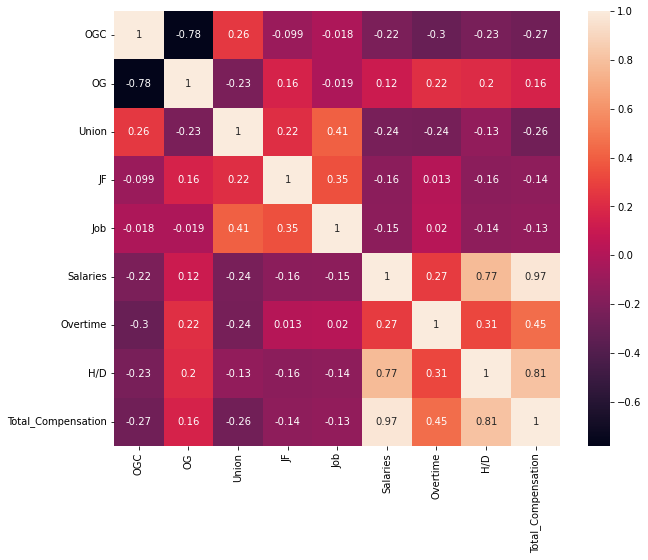

In [127]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    sns.heatmap(df_final.corr(), annot=True)

In [128]:
print('OG len of unique values: ',len(df['OG'].unique()))
print('DG len of unique values: ',len(df['DC'].unique()))
print('Dept len of unique values: ',len(df['Dept'].unique()))
print('Union len of unique values: ',len(df['Union'].unique()))
print('JF len of unique values: ',len(df['JF'].unique()))
print('Job len of unique values: ',len(df['Job'].unique()))
print('YT len of unique values: ',len(df['YT'].unique()))

OG len of unique values:  7
DG len of unique values:  54
Dept len of unique values:  54
Union len of unique values:  73
JF len of unique values:  55
Job len of unique values:  1136
YT len of unique values:  2


In [129]:
df.dtypes

Year                    int64
OGC                     int64
OG                      int64
DC                      int64
Dept                    int64
UC                      int64
Union                   int64
JF                      int64
Job                     int64
EI                      int64
Salaries                int64
Overtime                int64
H/D                   float64
YT                      int64
Total_Compensation      int64
dtype: object

In [130]:
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,0,19,45,250,57,28,671,6573,12196,0,0.00,0,16158
1,2013,4,0,19,45,39,63,23,1011,24427,74639,2820,12703.31,1,115784
2,2015,6,2,5,5,21,52,6,911,44916,100554,0,12424.50,0,144708
3,2016,1,5,39,42,911,47,35,925,32497,140164,52754,13043.87,1,242323
4,2013,2,6,28,38,21,52,22,496,27932,58813,0,7655.28,0,82106


In [131]:
# First five rows of the selected features from dataset

df[['OGC','Salaries','UC','Overtime','H/D','Total_Compensation']].head()

,OGC,Salaries,UC,Overtime,H/D,Total_Compensation
0,4,12196,250,0,0.00,16158
1,4,74639,39,2820,12703.31,115784
2,6,100554,21,0,12424.50,144708
3,1,140164,911,52754,13043.87,242323
4,2,58813,21,0,7655.28,82106


/Users/sahreenhaider/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sahreenhaider/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sahreenhaider/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

<Figure size 1152x864 with 0 Axes>

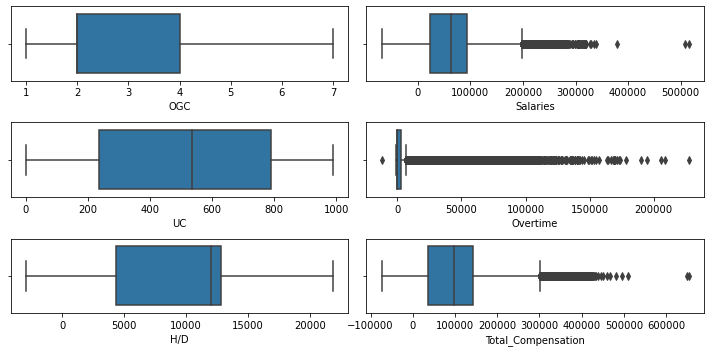

In [132]:
# Outlier detection

with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(16,12))
    fig, axs = plt.subplots(3,2, figsize = (10,5))
    plt1 = sns.boxplot(df['OGC'], ax = axs[0,0])
    plt2 = sns.boxplot(df['Salaries'], ax = axs[0,1])
    plt3 = sns.boxplot(df['UC'], ax = axs[1,0])
    plt4 = sns.boxplot(df['Overtime'], ax = axs[1,1])
    plt5 = sns.boxplot(df['H/D'], ax = axs[2,0])
    plt6 = sns.boxplot(df['Total_Compensation'], ax = axs[2,1])

plt.tight_layout();

/Users/sahreenhaider/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


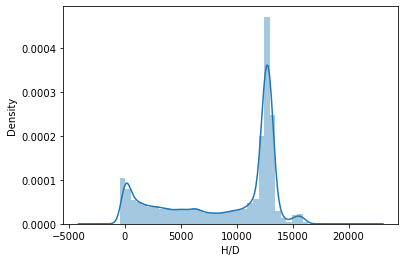

In [133]:
with rc_context({'figure.facecolor':'white'}):
    sns.distplot(df['H/D'])

In [134]:
# maximum value in salaries

df.Salaries.max()

515101

/Users/sahreenhaider/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


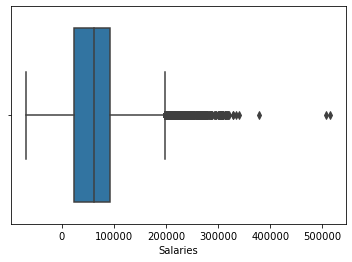

In [135]:
# checking in for outlier from the feature Salaries

with rc_context({'figure.facecolor':'white'}):
    sns.boxplot(df.Salaries)

In [136]:
# scaling the data using Standard Scaler

scaler = StandardScaler()

df_1 = scaler.fit_transform(df_final[['OGC', 'OG', 'Union', 'JF', 'Job', 'Salaries', 'Overtime', 'H/D']])

In [137]:
df_1 = pd.DataFrame(df_1, columns=['OGC', 'OG', 'Union', 'JF', 'Job', 'Salaries', 'Overtime', 'H/D'])

In [138]:
df_final = pd.concat([df_1,df_final['Total_Compensation']], axis=1)

In [139]:
df_final.head()

,OGC,OG,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
0,0.649913,-1.443249,0.404551,-0.144142,0.069524,-1.144004,-0.397237,-1.825247,16158
1,0.649913,-1.443249,0.781725,-0.509885,1.215324,0.254853,-0.142704,0.770410,115784
2,1.919284,-0.618162,0.090239,-1.753409,0.878324,0.835405,-0.397237,0.713441,144708
3,-1.254143,0.619469,-0.224073,0.367898,0.925504,1.722754,4.364333,0.839996,242323
4,-0.619458,1.032013,0.090239,-0.583033,-0.520226,-0.099683,-0.397237,-0.261050,82106


In [140]:
# splitting the dataset into the target variable and independent variables here

X = df_final[['OGC', 'OG', 'Union', 'JF', 'Job', 'Salaries', 'Overtime', 'H/D']]
y = df_final['Total_Compensation']

In [141]:
print(X.shape)
print(y.shape)

(287836, 8)
(287836,)


In [142]:
# using train test split from sklearn.model_selection to divide the variables into the training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [143]:
# Model building

model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [144]:
# Predicting the values for the test data

y_pred = model.predict(X_test)

In [145]:
print(r2_score(y_test, y_pred))

0.9877844873267635


In [146]:
print(mean_squared_error(y_test, y_pred))

55888300.58015226
